In [32]:
import pandas as pd
import numpy as np

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(url,match='Коефіцієнт народжуваності в регіонах України' )[0]
df.head(5)


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [33]:
# Вивести перші рядки таблиці
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [34]:
# Визначити кількість рядків та стовпців
print("Розмір таблиці:", df.shape)

Розмір таблиці: (28, 9)


In [37]:
# Замінити "—" на NaN
df.replace("—", np.nan, inplace=True)

In [38]:
# Визначити типи стовпців
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [39]:
# Замінити типи нечислових колонок на числові
non_numeric_columns = [col for col in df.columns if df[col].dtype == object]
for col in non_numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [40]:
# Порахувати частку пропусків
missing_percentage = df.isnull().sum() / len(df) * 100
print("Частка пропусків в кожній колонці:")
print(missing_percentage)

Частка пропусків в кожній колонці:
Регіон    100.000000
1950        7.142857
1960        3.571429
1970        3.571429
1990        0.000000
2000        0.000000
2012        0.000000
2014        7.142857
2019       14.285714
dtype: float64


In [41]:
# Видалити дані по всій країні (останній рядок)
df = df.iloc[:-1]

In [42]:
# Замінити відсутні дані середніми значеннями
df.fillna(df.mean(), inplace=True)

In [43]:
# Отримати список регіонів, де народжуваність у 2019 році вища за середню по Україні
regions_higher_than_average = df[df["2019"] > df["2019"].mean()]["Регіон"]
print("Регіони з народжуваністю вищою за середню в 2019 році:")
print(regions_higher_than_average)

Регіони з народжуваністю вищою за середню в 2019 році:
2    NaN
6    NaN
8    NaN
12   NaN
14   NaN
16   NaN
20   NaN
23   NaN
25   NaN
Name: Регіон, dtype: float64


In [44]:
# Знайти регіон з найвищою народжуваністю в 2014 році
region_with_highest_birthrate_2014 = df[df["2014"] == df["2014"].max()]["Регіон"]
print("Регіон з найвищою народжуваністю в 2014 році:")
print(region_with_highest_birthrate_2014)

Регіон з найвищою народжуваністю в 2014 році:
16   NaN
Name: Регіон, dtype: float64


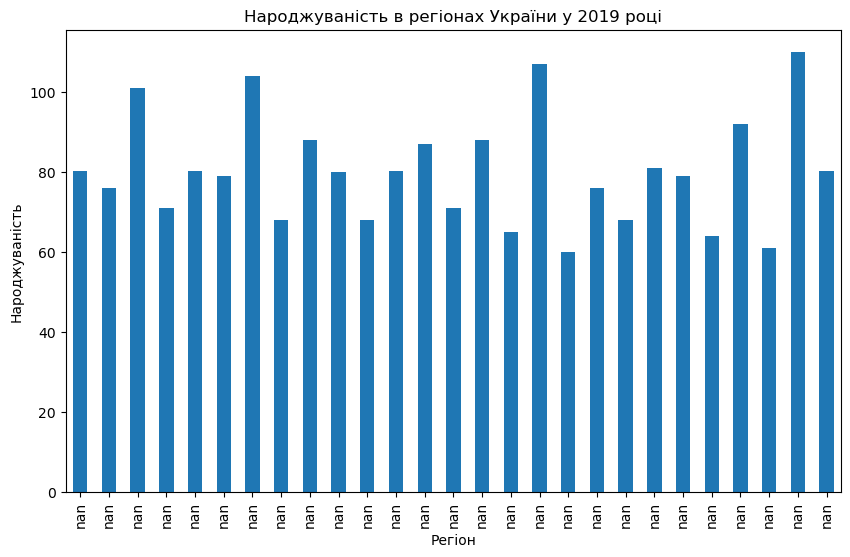

In [46]:
# Побудувати стовпчикову діаграму народжуваності в 2019 році
import matplotlib.pyplot as plt

df.set_index("Регіон")["2019"].plot(kind="bar", figsize=(10, 6))
plt.title("Народжуваність в регіонах України у 2019 році")
plt.xlabel("Регіон")
plt.ylabel("Народжуваність")
plt.show()

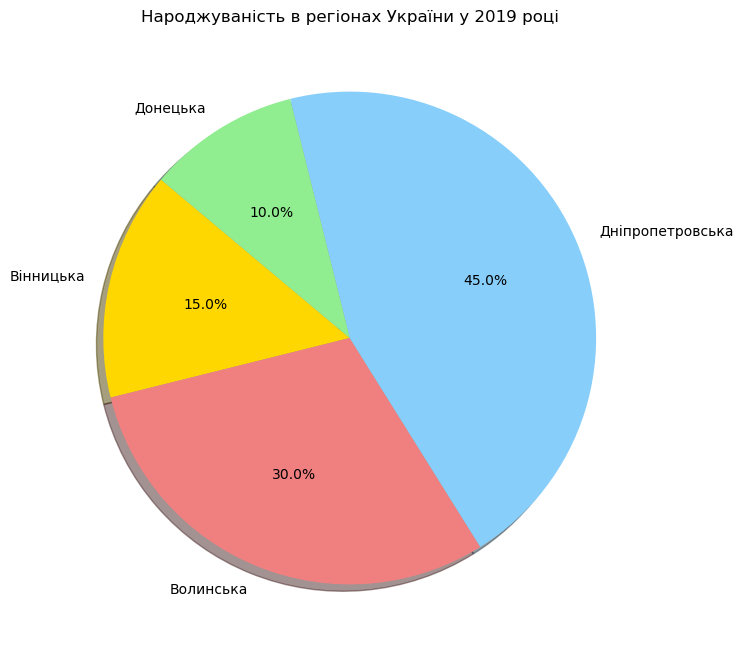

In [47]:
labels = ['Вінницька', 'Волинська', 'Дніпропетровська', 'Донецька']
sizes = [15, 30, 45, 10]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Народжуваність в регіонах України у 2019 році')

plt.show()

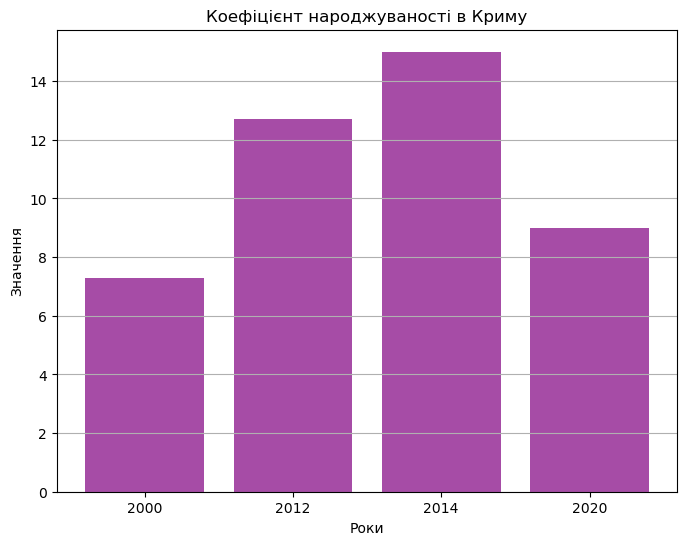

In [54]:
categories = ['2000', '2012', '2014', '2020']
values = [7.3, 12.7, 15, 9]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='purple', alpha=0.7)
plt.title('Коефіцієнт народжуваності в Кримy')
plt.xlabel('Роки')
plt.ylabel('Значення')
plt.grid(axis='y')

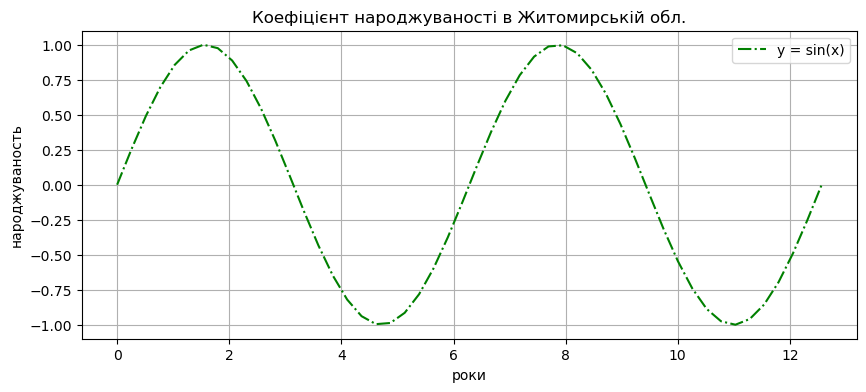

In [65]:
# Графік 3: Синусоїда
x3 = np.linspace(0, 4 * np.pi, 50)
y3 = np.sin(x3)
plt.figure(figsize=(10, 4))
plt.plot(x3, y3, label='y = sin(x)', color='green', linestyle='-.')
plt.title('Коефіцієнт народжуваності в Житомирській обл.')
plt.xlabel('роки')
plt.ylabel('народжуваность')
plt.grid(True)
plt.legend()